In [1]:
# importing basic library
import numpy as np
import pandas as pd
# importing visulization library
import seaborn as sns
import matplotlib.pyplot as plt
# importing sklearn packages
from sklearn.linear_model import LinearRegression , Ridge , Lasso # mode importing
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split # data splitting
from sklearn.preprocessing import MinMaxScaler,StandardScaler # for scaling purpose
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # model evaluation 
# importing stats packages
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check no multi-colinearity
from scipy.stats import shapiro,normaltest,kstest  # to check normality of residual
from scipy.stats import mode # to check mode of any column
import scipy.stats as sts # for q-q plot
import statsmodels.api as sm # for q-q plot
# importing other dependency
import pickle # to dump model
import json  # to dump data
import warnings  # to handle warnings
warnings.filterwarnings("ignore")

## 1) Problem Statement

## 2) Data Gathering

In [2]:
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


## 3) EDA - Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [4]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [5]:
df.isna().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [6]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

<AxesSubplot:>

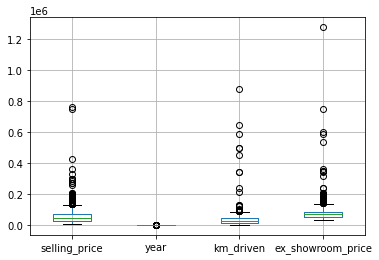

In [7]:
df.boxplot()

In [8]:
df['name'].unique()

array(['Royal Enfield Classic 350', 'Honda Dio',
       'Royal Enfield Classic Gunmetal Grey',
       'Yamaha Fazer FI V 2.0 [2016-2018]', 'Yamaha SZ [2013-2014]',
       'Honda CB Twister', 'Honda CB Hornet 160R',
       'Royal Enfield Bullet 350 [2007-2011]', 'Hero Honda CBZ extreme',
       'Bajaj Discover 125', 'Yamaha FZ16', 'Honda Navi',
       'Bajaj Avenger Street 220', 'Yamaha YZF R3', 'Jawa 42',
       'Suzuki Access 125 [2007-2016]', 'Hero Honda Glamour',
       'Yamaha YZF R15 S', 'Yamaha FZ25', 'Hero Passion Pro 110',
       'Honda Navi [2016-2017]', 'Honda Activa i', 'Jawa Standard',
       'Royal Enfield Thunderbird 350', 'Honda Dream Yuga',
       'TVS Apache RTR 160 4V', 'Yamaha Fazer [2009-2016]',
       'Hero Honda Splendor NXG', 'Hero Glamour 125',
       'Yamaha FZ S [2012-2016]', 'Hero Xtreme Sports', 'Honda X-Blade',
       'Honda CB Shine SP', 'Honda Activa 5G', 'Honda CBR-250R',
       'Hero Honda Passion PRO [2012]', 'Bajaj Dominar 400',
       'Hero Glamour F

In [9]:
df['selling_price'].unique()

array([175000,  45000, 150000,  65000,  20000,  18000,  78500, 180000,
        30000,  50000,  35000,  28000,  80000, 365000, 185000,  25000,
        40000, 120000,  15000,  26000,  32000, 110000,  42000,  21000,
        55000,  38000,  43000,  62000,  60000,  90000, 125000,  85000,
        29900,  70000,  48000,  34000, 165000,  29500,  95000,   7500,
       160000, 140000,  22000,  22989,  24999,  75000,  17500,  57000,
        83900, 135000, 299000, 750000, 190000, 130000,  54786,  72000,
       100000, 138000, 170000, 123000,  23000,  41000,  47999,  36999,
        12000,  27000,  10000,  56000,  58000,  87000, 145000,   9000,
        14000,  17000, 210000,  54000, 260000,  98000, 200000, 195000,
       270000, 425000, 760000,  37000, 330000, 162000, 285000,  69000,
       300000,  26500,  78000,   8000,  39000,  36000,  16000,  83299,
        14700,  19000,  14900,  24000,  24700,  52000,  47000, 105000,
       115000,   5000,  86000,  28700,   6000,  23500,  68000,  20100,
      

In [10]:
df['year'].unique()

array([2019, 2017, 2018, 2015, 2011, 2010, 2008, 2016, 2020, 2012, 2006,
       2013, 2009, 2014, 2004, 2007, 2000, 2002, 2005, 1997, 2001, 1988,
       1999, 1998, 1991, 2003, 1993, 1995], dtype=int64)

In [11]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [12]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [13]:
df['km_driven'].unique()

array([   350,   5650,  12000,  23000,  21000,  60000,  17000,  39000,
        32000,  42000,  10000,  21178,   1127,   1700,  55000,  27000,
        45000,  17450,  20696,   2000,  20000,  35000,  15210,  24000,
         2500,  75000,  50000,   6502,  16000,  13000,  12800,   4600,
        81000,   8000,  57000,  26000,  29000,  43000,  40000,   3000,
        80000,  30000,  41000,   8150,   1933,  55750,  15856,   3700,
        21938,  48000,  54000,  15000,   3500,   9000,  38000,  22000,
         9432,  70000, 500000,  30514, 130000,  25000,  22770,   6330,
          500,  43400,   7004,  16500,  12500,   9600,  11000,   7500,
       120000,   6465,  18803,   7000,   6100,  14000,  85000,  18000,
         1500,  90000,  36500,  49000,   8500,   3775,  14500,   4000,
        99000,  52000,   2300,  36000,  71000,  15888,   5600,  19612,
        33700, 100000,   6000,  46000,  72000,  67000,  15500,  60855,
        37714,  34601,  44000,  17500,   6500,   2200,  66191,  32800,
      

In [14]:
df['ex_showroom_price'].unique()

array([     nan,  148114.,   89643.,   53857.,   87719.,   60122.,
         78712.,   47255.,   95955.,  351680.,   58314.,  117926.,
        132680.,   44389.,   53900.,   56147.,   84751.,   61600.,
         79432.,   78350.,   71049.,   57557.,  202310.,   71150.,
         56750.,   84042.,   69750.,   59844.,   42859.,   73413.,
         49900.,   59422.,   57549.,   51994.,   80350.,   54605.,
         88161.,   78513.,   50098.,  195500.,   92074.,  164004.,
         74295.,   49642.,   51112.,   53751.,   50267.,   61653.,
         70851.,   53079.,  133680.,  181445.,   65626.,   58438.,
         61118.,   75936.,  180525.,   87543.,   80435.,   85011.,
       1278000.,  155740.,  202127.,   86744.,  156304.,   84246.,
         49521.,   64589.,   69983.,   54299.,   72303.,   65800.,
         58757.,   47032.,   79233.,  118997.,   52949.,   64071.,
         61545.,  168482.,  163331.,   59095.,   75502.,   52271.,
         63331.,   52372.,   58630.,   94703.,   53436.,   591

## 4) Feature Engineering

### 4.1) name

In [3]:
df = pd.get_dummies(df,columns=['name'])
df.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,name_Activa 3g,name_Activa 4g,name_Aprilia SR 125,name_BMW G310GS,...,name_Yamaha SZ [2013-2014],name_Yamaha SZ-S,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yamaha YZF R3,name_Yo Style
0,175000,2019,Individual,1st owner,350,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45000,2017,Individual,1st owner,5650,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,150000,2018,Individual,1st owner,12000,148114.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,65000,2015,Individual,1st owner,23000,89643.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20000,2011,Individual,2nd owner,21000,NaN,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### 4.2) selling_price

<AxesSubplot:xlabel='selling_price'>

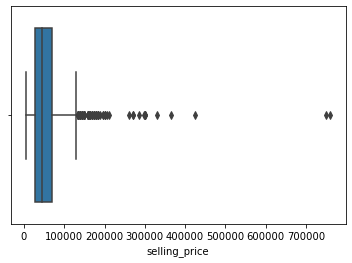

In [16]:
sns.boxplot(df['selling_price']) # target columns

### 4.3) year

In [4]:
df['no_of_years'] = 2022 - df['year']
df.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,name_Activa 3g,name_Activa 4g,name_Aprilia SR 125,name_BMW G310GS,...,name_Yamaha SZ-S,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yamaha YZF R3,name_Yo Style,no_of_years
0,175000,2019,Individual,1st owner,350,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,45000,2017,Individual,1st owner,5650,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,150000,2018,Individual,1st owner,12000,148114.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,65000,2015,Individual,1st owner,23000,89643.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,20000,2011,Individual,2nd owner,21000,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [5]:
df.drop('year',axis=1,inplace=True)

### 4.4) seller_type

In [19]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [6]:
df['seller_type'] = df['seller_type'].replace({'Individual':0,'Dealer':1})
df['seller_type'].unique()

array([0, 1], dtype=int64)

### 4.5) owner

In [21]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [7]:
df['owner'] = df['owner'].replace({'1st owner':1,'2nd owner':2,'3rd owner':3,'4th owner':4})
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

### 4.6) km_driven

In [23]:
df['km_driven'].unique()

array([   350,   5650,  12000,  23000,  21000,  60000,  17000,  39000,
        32000,  42000,  10000,  21178,   1127,   1700,  55000,  27000,
        45000,  17450,  20696,   2000,  20000,  35000,  15210,  24000,
         2500,  75000,  50000,   6502,  16000,  13000,  12800,   4600,
        81000,   8000,  57000,  26000,  29000,  43000,  40000,   3000,
        80000,  30000,  41000,   8150,   1933,  55750,  15856,   3700,
        21938,  48000,  54000,  15000,   3500,   9000,  38000,  22000,
         9432,  70000, 500000,  30514, 130000,  25000,  22770,   6330,
          500,  43400,   7004,  16500,  12500,   9600,  11000,   7500,
       120000,   6465,  18803,   7000,   6100,  14000,  85000,  18000,
         1500,  90000,  36500,  49000,   8500,   3775,  14500,   4000,
        99000,  52000,   2300,  36000,  71000,  15888,   5600,  19612,
        33700, 100000,   6000,  46000,  72000,  67000,  15500,  60855,
        37714,  34601,  44000,  17500,   6500,   2200,  66191,  32800,
      

### 4.7) ex_showroom_price

In [24]:
df['ex_showroom_price'].isna().sum()

435

In [8]:
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean())

In [9]:
df['ex_showroom_price'].isna().sum()

0

## Linearity

In [27]:
df.corr()

,selling_price,seller_type,owner,km_driven,ex_showroom_price,name_Activa 3g,name_Activa 4g,name_Aprilia SR 125,name_BMW G310GS,name_Bajaj ct 100,...,name_Yamaha SZ-S,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yamaha YZF R3,name_Yo Style,no_of_years
selling_price,1.000000,-0.017382,-0.001927,-0.212937,0.750451,-0.022114,-0.010718,8.001428e-03,0.131182,-0.022725,...,-0.005260,-0.002181,-0.010718,-0.018640,0.015002,0.065916,0.009418,0.166658,-0.021633,-0.402188
seller_type,-0.017382,1.000000,0.035284,0.001314,0.000366,-0.003277,-0.002316,-3.277302e-03,-0.002316,-0.002316,...,-0.002316,-0.004016,-0.002316,-0.003277,-0.005687,-0.003277,0.161927,-0.002316,-0.002316,0.050293
owner,-0.001927,0.035284,1.000000,0.139740,0.111152,-0.015682,-0.011084,-1.568236e-02,-0.011084,-0.011084,...,-0.011084,-0.019216,-0.011084,-0.015682,0.004035,-0.015682,-0.027214,-0.011084,-0.011084,0.224308
km_driven,-0.212937,0.001314,0.139740,1.000000,-0.082539,0.181828,-0.019679,-2.472754e-02,-0.018965,0.000381,...,-0.008548,-0.021355,-0.004381,-0.011778,-0.015141,-0.023506,-0.020939,-0.019782,-0.014500,0.288675
ex_showroom_price,0.750451,0.000366,0.111152,-0.082539,1.000000,-0.025542,-0.019085,2.075300e-18,0.134800,-0.028897,...,-0.007966,-0.024175,-0.019849,-0.024378,0.037995,0.021350,0.032794,0.136184,-0.025966,-0.068111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
name_Yamaha YZF R15 V3,0.065916,-0.003277,-0.015682,-0.023506,0.021350,-0.001889,-0.001335,-1.888574e-03,-0.001335,-0.001335,...,-0.001335,-0.002314,-0.001335,-0.001889,-0.003277,1.000000,-0.003277,-0.001335,-0.001335,-0.046831
name_Yamaha YZF R15 [2011-2018],0.009418,0.161927,-0.027214,-0.020939,0.032794,-0.003277,-0.002316,-3.277302e-03,-0.002316,-0.002316,...,-0.002316,-0.004016,-0.002316,-0.003277,-0.005687,-0.003277,1.000000,-0.002316,-0.002316,0.009363
name_Yamaha YZF R3,0.166658,-0.002316,-0.011084,-0.019782,0.136184,-0.001335,-0.000943,-1.334794e-03,-0.000943,-0.000943,...,-0.000943,-0.001636,-0.000943,-0.001335,-0.002316,-0.001335,-0.002316,1.000000,-0.000943,-0.036671
name_Yo Style,-0.021633,-0.002316,-0.011084,-0.014500,-0.025966,-0.001335,-0.000943,-1.334794e-03,-0.000943,-0.000943,...,-0.000943,-0.001636,-0.000943,-0.001335,-0.002316,-0.001335,-0.002316,-0.000943,1.000000,0.020484


## No-multicolinerity

In [28]:
vif = pd.DataFrame()
df1 = df.drop('selling_price',axis=1)
vif['features'] = df1.columns
vif['vif-factor'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif

,features,vif-factor
0,seller_type,1.182903
1,owner,1.657062
2,km_driven,1.658466
3,ex_showroom_price,94.162877
4,name_Activa 3g,1.233272
...,...,...
279,name_Yamaha YZF R15 V3,1.724592
280,name_Yamaha YZF R15 [2011-2018],3.183048
281,name_Yamaha YZF R3,4.132310
282,name_Yo Style,1.071117


## 5) Model Training ( on row data)

In [10]:
x = df.drop('selling_price',axis=1)
y = df['selling_price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

lr_model =  LinearRegression()
lr_model.fit(x_train,y_train)


LinearRegression()

## Normality of residual

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

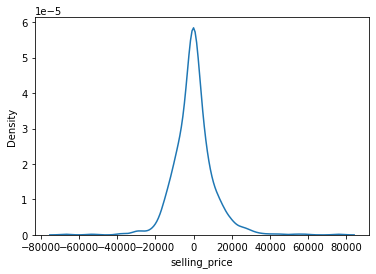

In [11]:
y_pred_train = lr_model.predict(x_train)

residual = y_train - y_pred_train

sns.kdeplot(residual)

### shapiro

In [12]:
_,p_val = shapiro(residual)
print(p_val)
if p_val > 0.05:
    print('data is normal dist')
else:
    print('data is not normal dist')

1.2099005827977087e-22
data is not normal dist


## 6) Model Evaluation

In [13]:
# training

y_pred_train = lr_model.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('MAE ',mae)

mse = mean_squared_error(y_train,y_pred_train)
print('MSE ',mse)

r2 = r2_score(y_train,y_pred_train)
print('r2  ',r2)

MAE  6894.876132318058
MSE  112185898.3435281
r2   0.9670222595639456


In [14]:
# testing

y_pred_test = lr_model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_test)
print('MAE ',mae)

mse = mean_squared_error(y_test,y_pred_test)
print('MSE ',mse)

r2 = r2_score(y_test,y_pred_test)
print('r2  ',r2)

MAE  18473.17199862267
MSE  992551183.0321033
r2   0.5546443040804698


# Feature Engineering

In [16]:
obj_lasso = Lasso(alpha=1.0)
obj_lasso.fit(x_train,y_train)

Lasso()

In [17]:
# training

y_pred_train = obj_lasso.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('MAE ',mae)

mse = mean_squared_error(y_train,y_pred_train)
print('MSE ',mse)

r2 = r2_score(y_train,y_pred_train)
print('r2  ',r2)

MAE  7072.110584717323
MSE  114693385.08226255
r2   0.966285168289215


In [18]:
# testing

y_pred_test = obj_lasso.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_test)
print('MAE ',mae)

mse = mean_squared_error(y_test,y_pred_test)
print('MSE ',mse)

r2 = r2_score(y_test,y_pred_test)
print('r2  ',r2)

MAE  17047.908564720165
MSE  1029028740.7199928
r2   0.5382768981801442


### Hyperparameter tuning

In [80]:
estimator = Lasso()
para = {'alpha':np.arange(0.1,35,0.1)}
obj_random = RandomizedSearchCV(estimator,para,cv=5)
obj_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7....
       27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6,
       28.7, 28.8, 28.9, 29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7,
       29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8,
       30.9, 31. , 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9,
       32. , 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33. ,
       33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1,

In [81]:
obj_random.best_estimator_

Lasso(alpha=17.8)

In [97]:
ob_lasso = Lasso(alpha=18.50)
ob_lasso.fit(x_train,y_train)

Lasso(alpha=18.5)

In [98]:
# training

y_pred_train = ob_lasso.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('MAE ',mae)

mse = mean_squared_error(y_train,y_pred_train)
print('MSE ',mse)

r2 = r2_score(y_train,y_pred_train)
print('r2  ',r2)

MAE  9144.409334840593
MSE  158663621.80456415
r2   0.953359844563592


In [99]:
# testing

y_pred_test = ob_lasso.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_test)
print('MAE ',mae)

mse = mean_squared_error(y_test,y_pred_test)
print('MSE ',mse)

r2 = r2_score(y_test,y_pred_test)
print('r2  ',r2)


# 4.81 > 62
# 7.61 > 63
# 14.3 > 64
#18.50 > 64 

MAE  14786.454321300651
MSE  806700729.7583158
r2   0.6380350242465156


In [31]:
df

,selling_price,seller_type,owner,km_driven,ex_showroom_price,name_Activa 3g,name_Activa 4g,name_Aprilia SR 125,name_BMW G310GS,name_Bajaj ct 100,...,name_Yamaha SZ-S,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yamaha YZF R3,name_Yo Style,no_of_years
0,175000,0,1,350,87958.714058,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,45000,0,1,5650,87958.714058,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,150000,0,1,12000,148114.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,65000,0,1,23000,89643.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,20000,0,2,21000,87958.714058,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,17000,0,1,500000,52000.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1057,16000,0,1,33000,51000.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1058,15000,0,2,35000,57000.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1059,12000,0,1,53000,58000.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


### standardization

In [34]:

# obj_std = StandardScaler()

# scaled_km_driven = obj_std.fit_transform(df[['km_driven']])
# df['scaled_km_driven'] = pd.DataFrame(scaled_km_driven)
# df.drop('km_driven',axis=1,inplace=True)


In [35]:
# scaled_ex_showroom_price = obj_std.fit_transform(df[['ex_showroom_price']])
# df['scaled_ex_showroom_price'] = pd.DataFrame(scaled_ex_showroom_price)
# df.drop('ex_showroom_price',axis=1,inplace=True)

In [37]:
df.head(5)

,selling_price,seller_type,owner,name_Activa 3g,name_Activa 4g,name_Aprilia SR 125,name_BMW G310GS,name_Bajaj ct 100,name_Bajaj Avenger 150,name_Bajaj Avenger 150 street,...,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yamaha YZF R3,name_Yo Style,no_of_years,scaled_km_driven,scaled_ex_showroom_price
0,175000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,-0.659120,2.446557e-16
1,45000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,-0.556405,2.446557e-16
2,150000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,-0.433340,1.011367e+00
3,65000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,-0.220157,2.831724e-02
4,20000,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,-0.258917,2.446557e-16


In [38]:
# # model training

# x = df.drop('selling_price',axis=1)
# y = df['selling_price']

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

# lr_model =  LinearRegression()
# lr_model.fit(x_train,y_train)


LinearRegression()

In [39]:
# # training

# y_pred_train = lr_model.predict(x_train)

# mae = mean_absolute_error(y_train,y_pred_train)
# print('MAE ',mae)

# mse = mean_squared_error(y_train,y_pred_train)
# print('MSE ',mse)

# r2 = r2_score(y_train,y_pred_train)
# print('r2  ',r2)

MAE  6895.420400943396
MSE  112185873.70400943
r2   0.9670222668068849


In [40]:
# # testing

# y_pred_test = lr_model.predict(x_test)

# mae = mean_absolute_error(y_test,y_pred_test)
# print('MAE ',mae)

# mse = mean_squared_error(y_test,y_pred_test)
# print('MSE ',mse)

# r2 = r2_score(y_test,y_pred_test)
# print('r2  ',r2)

MAE  198442531863340.8
MSE  3.2499824637110444e+29
r2   -1.4582605175389594e+20


In [ ]:
# replaced columns

# df['seller_type'].unique() >> array(['Individual', 'Dealer'], dtype=object)

# df['owner'].unique() >> array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [101]:
bike_data = {'seller_type':{"Individual":0,"Dealer":1},
             "owner":{'1st owner':1,'2nd owner':2,'3rd owner':3,'4th owner':4},
             'columns':list(x.columns)}

In [102]:
with open('bike_data.json','w') as f:
    json.dump(bike_data,f)

In [103]:
with open('bike_model.pkl','wb') as f:
    pickle.dump(ob_lasso,f)